<a href="https://colab.research.google.com/github/Piyush-Singh75/MLproject/blob/main/Deoldify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

ColorFIDBenchmarkArtistic.ipynb         ImageColorizerColab.ipynb        requirements.txt
ColorizeTrainingArtistic.ipynb          ImageColorizerColabStable.ipynb  resource_images/
ColorizeTrainingStable.ipynb            ImageColorizer.ipynb             result_images/
ColorizeTrainingStableLargeBatch.ipynb  ImageColorizerStableTests.ipynb  setup.py
ColorizeTrainingVideo.ipynb             LICENSE                          test_images/
ColorizeTrainingWandb.ipynb             MANIFEST.in                      tox.ini
deoldify/                               models/                          VideoColorizerColab.ipynb
environment.yml                         README.md                        VideoColorizer.ipynb
fastai/                                 requirements-colab.txt
ImageColorizerArtisticTests.ipynb       requirements-dev.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/DeOldify-master

/content/drive/MyDrive/DeOldify-master


In [ ]:
ls

ColorFIDBenchmarkArtistic.ipynb         ImageColorizerColab.ipynb        requirements.txt
ColorizeTrainingArtistic.ipynb          ImageColorizerColabStable.ipynb  resource_images/
ColorizeTrainingStable.ipynb            ImageColorizer.ipynb             result_images/
ColorizeTrainingStableLargeBatch.ipynb  ImageColorizerStableTests.ipynb  setup.py
ColorizeTrainingVideo.ipynb             LICENSE                          test_images/
ColorizeTrainingWandb.ipynb             MANIFEST.in                      tox.ini
deoldify/                               models/                          VideoColorizerColab.ipynb
environment.yml                         README.md                        VideoColorizer.ipynb
fastai/                                 requirements-colab.txt
ImageColorizerArtisticTests.ipynb       requirements-dev.txt


In [ ]:
!pip install opencv-python==4.4.0.42

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 MB 10.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 459.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

<DeviceId.GPU0: 0>

In [ ]:
from deoldify.visualize import *
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


In [ ]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

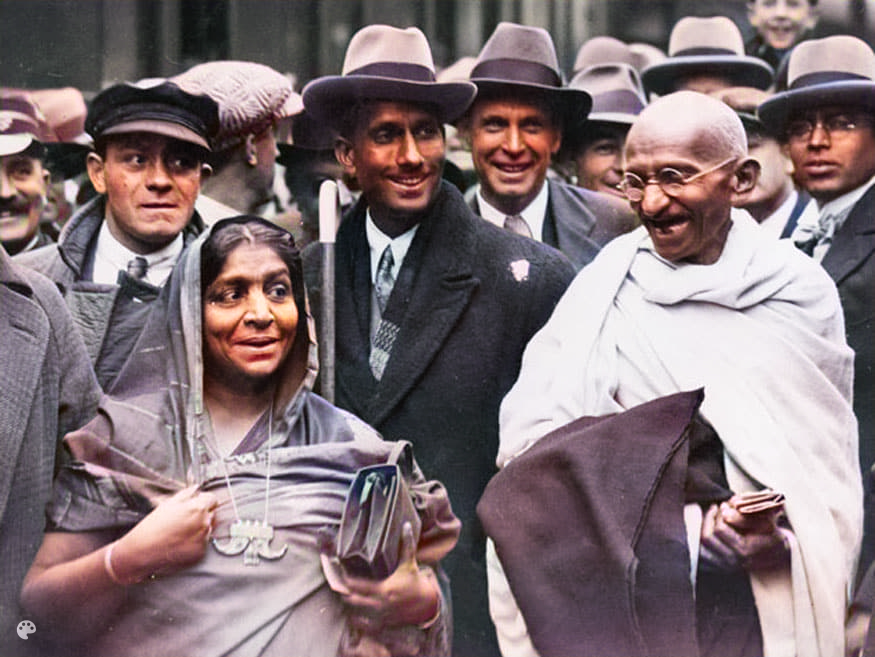

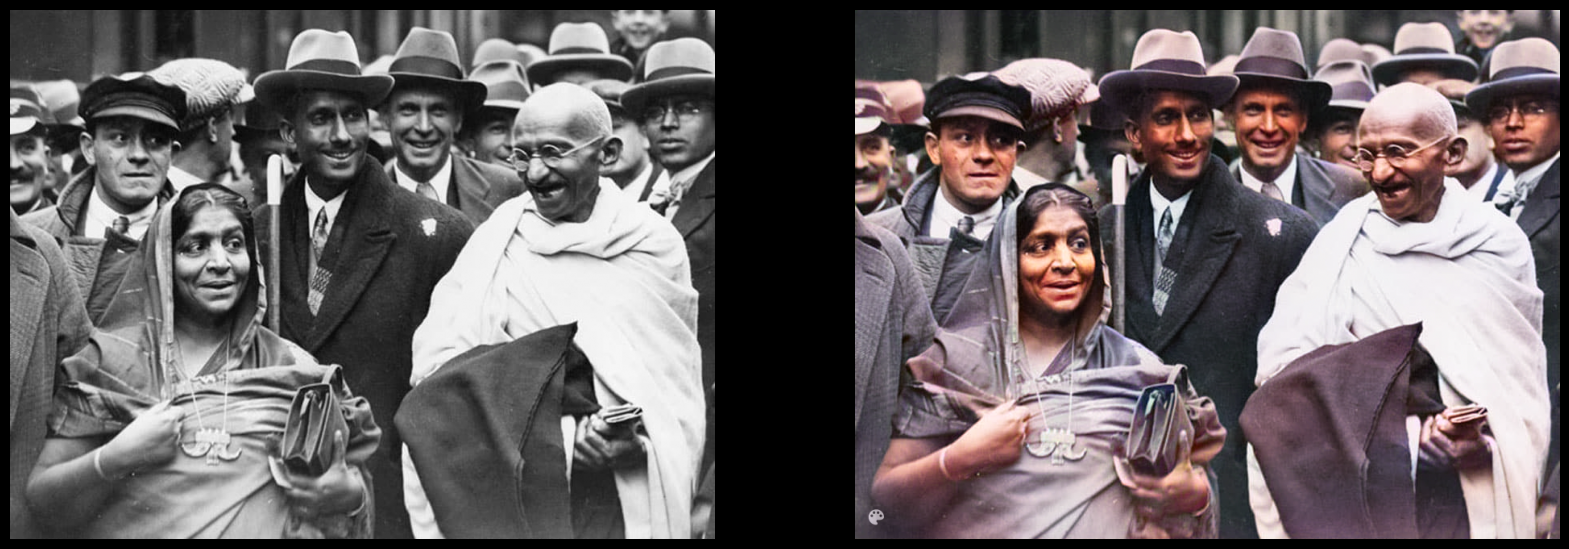

In [ ]:
render_factor=35

source_url='https://helpx.adobe.com/content/dam/help/en/photoshop/using/convert-color-image-black-white/jcr_content/main-pars/before_and_after/image-after/Landscape-BW.jpg'
source_path = 'test_images/image.png'

result_path = None

if source_url is not None:
    result_path = colorizer.plot_transformed_image_from_url(url=source_url, path=source_path, render_factor=render_factor, compare=True)
else:
    result_path = colorizer.plot_transformed_image(path=source_path, render_factor=render_factor, compare=True)

show_image_in_notebook(result_path)